Dataset Overview:

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOp

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\3128580032.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


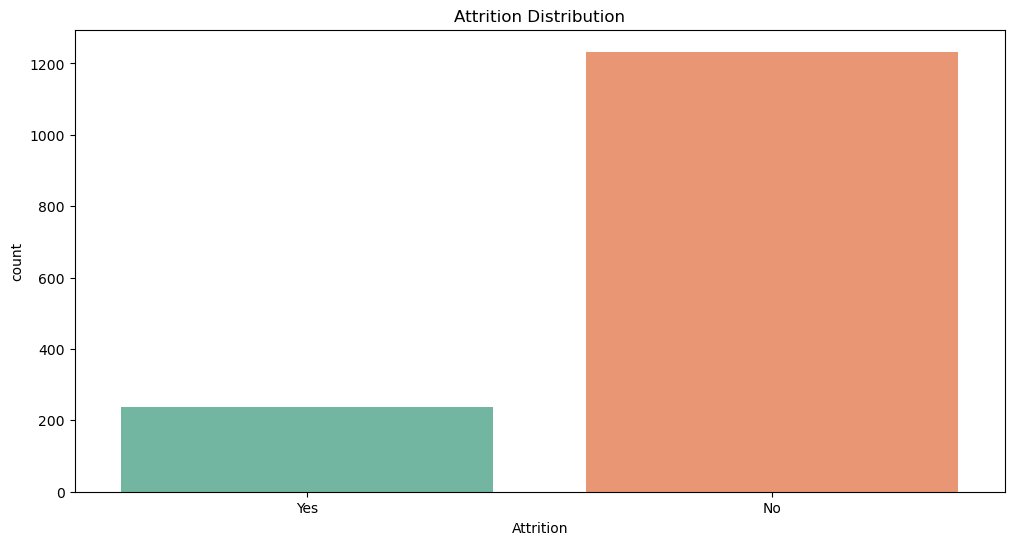

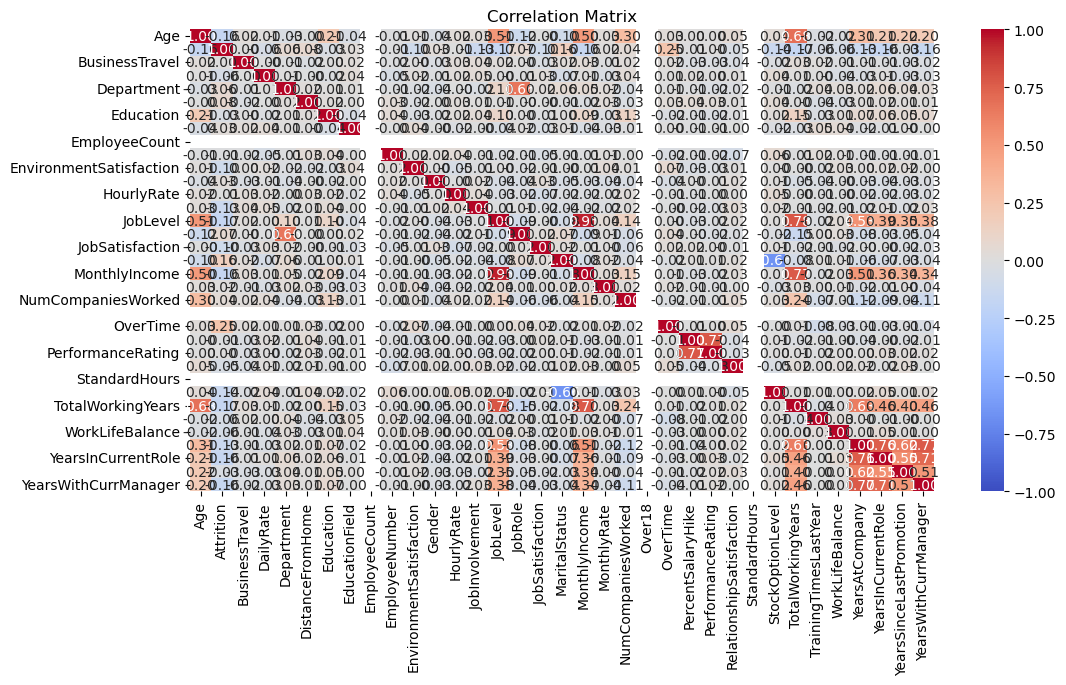

Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



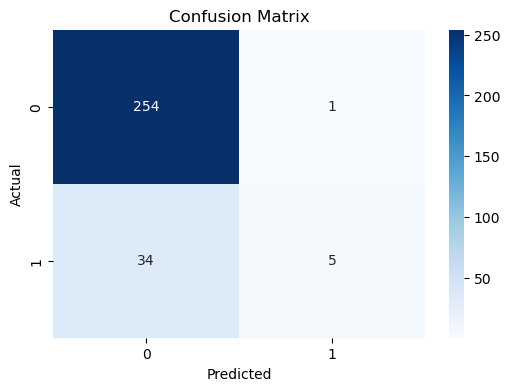

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\3128580032.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


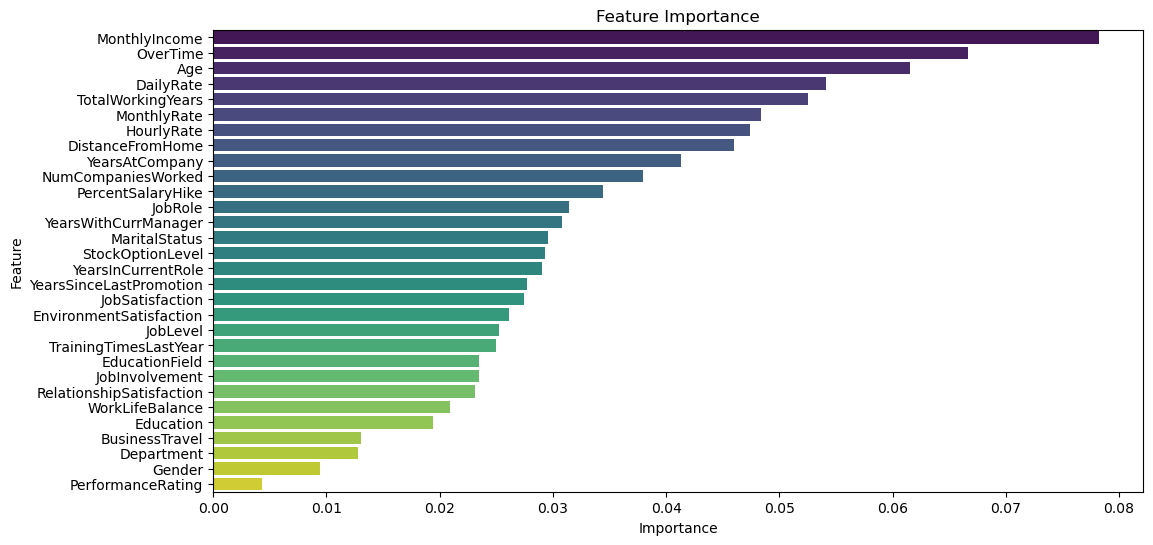

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)

# Display basic information
def display_info():
    print("Dataset Overview:\n")
    print(df.head())
    print("\nBasic Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nSummary Statistics:\n")
    print(df.describe())

display_info()

# Perform EDA
# Plot distributions of key features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()

# Encode categorical variables for correlation matrix
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
encoded_df = df.copy()
for col in categorical_columns:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

# Check correlations between numerical features
plt.figure(figsize=(12, 6))
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Preprocessing
# Encode categorical variables for model training
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
y = df['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()


Dataset Overview:

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOp

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\723619852.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


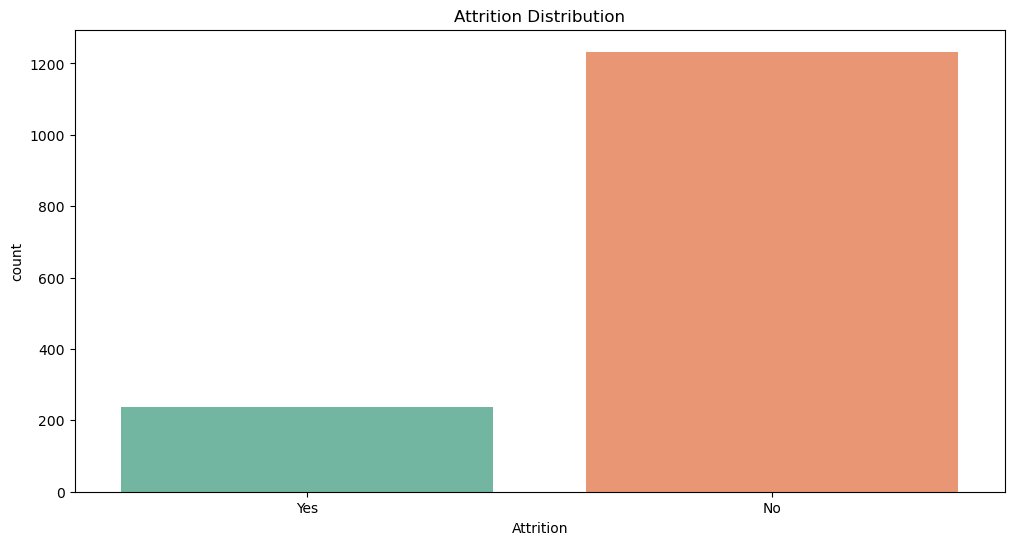

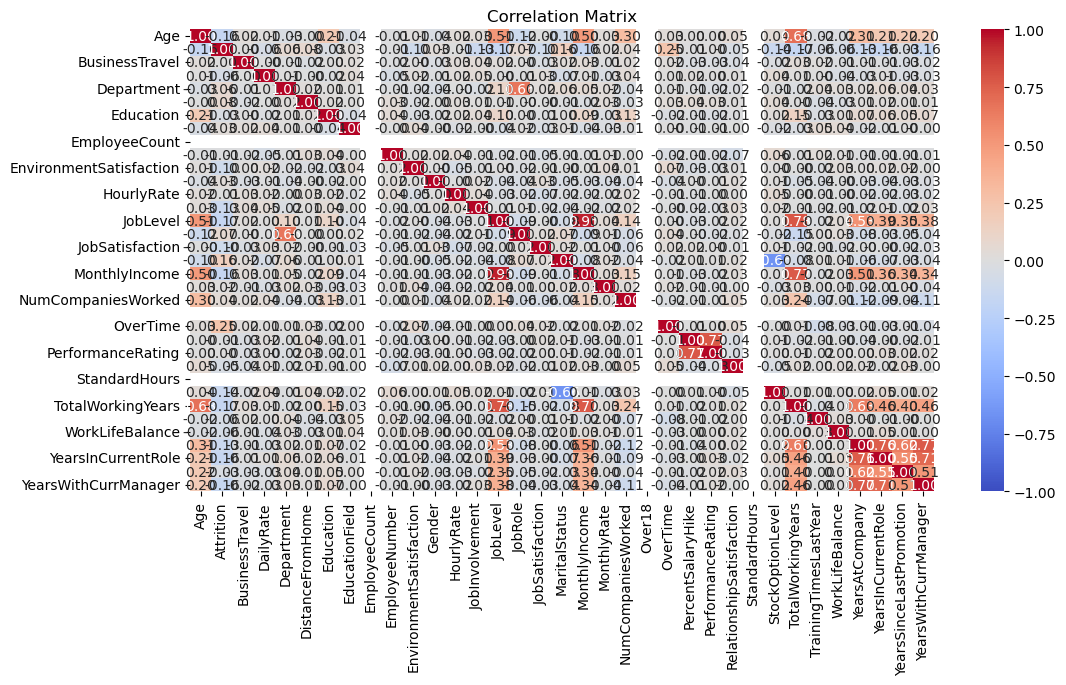

Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



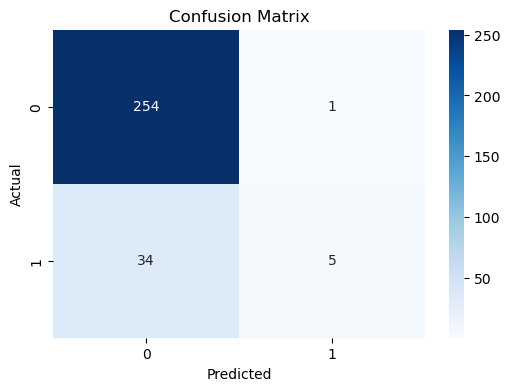

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\723619852.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


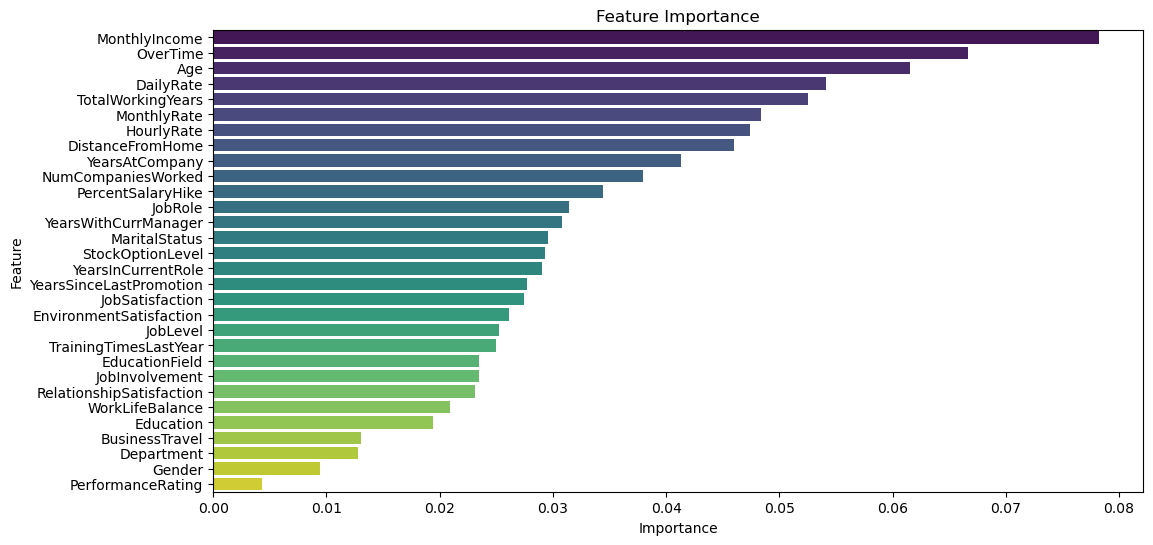

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\723619852.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_labels, y=promotion_counts, palette="pastel")


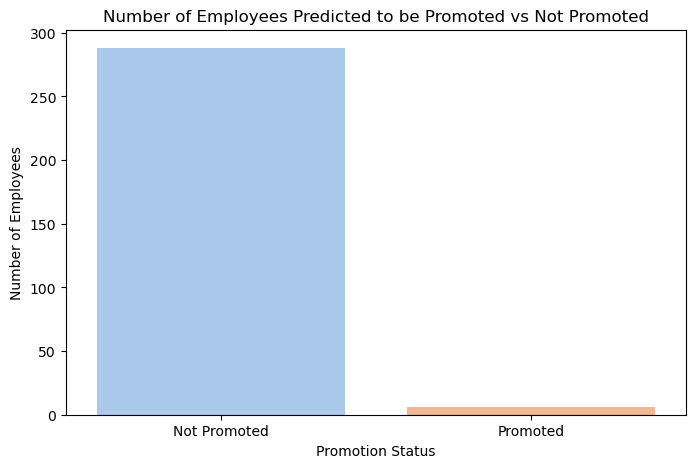

Percentage of employees predicted to be promoted: 2.04%


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)

# Display basic information
def display_info():
    print("Dataset Overview:\n")
    print(df.head())
    print("\nBasic Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nSummary Statistics:\n")
    print(df.describe())

display_info()

# Perform EDA
# Plot distributions of key features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()

# Encode categorical variables for correlation matrix
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
encoded_df = df.copy()
for col in categorical_columns:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

# Check correlations between numerical features
plt.figure(figsize=(12, 6))
corr_matrix = encoded_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Preprocessing
# Encode categorical variables for model training
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
y = df['Attrition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()

# Bar graph for promotion predictions
promotion_counts = pd.Series(y_pred).value_counts()
promotion_labels = ["Not Promoted", "Promoted"]
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_labels, y=promotion_counts, palette="pastel")
plt.title("Number of Employees Predicted to be Promoted vs Not Promoted")
plt.ylabel("Number of Employees")
plt.xlabel("Promotion Status")
plt.show()

# Calculate percentage of employees predicted to be promoted
total_employees = len(y_pred)
promoted_percentage = (promotion_counts[1] / total_employees) * 100
print(f"Percentage of employees predicted to be promoted: {promoted_percentage:.2f}%")


Dataset Overview:

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOp

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\3580329876.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bonus_labels, y=bonus_counts.values, palette="cool")


<Figure size 800x500 with 0 Axes>

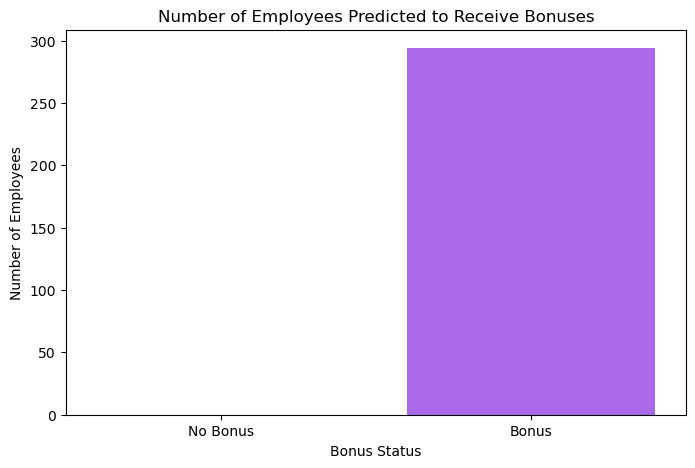

Percentage of employees predicted to receive bonuses: 100.00%
Percentage of employees predicted not to receive bonuses: 0.00%


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)

# Display basic information
def display_info():
    print("Dataset Overview:\n")
    print(df.head())
    print("\nBasic Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nSummary Statistics:\n")
    print(df.describe())

display_info()

# Selected features for predicting bonuses
selected_features = [
    "Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education",
    "EducationField", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel",
    "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears",
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# Encode categorical variables
categorical_columns = df[selected_features].select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Prepare data for bonus prediction
X_bonus = df[selected_features]
y_bonus = (df['PerformanceRating'] >= 3).astype(int)  # Bonus eligibility based on PerformanceRating >= 3

# Split the data
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(X_bonus, y_bonus, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_bonus = scaler.fit_transform(X_train_bonus)
X_test_bonus = scaler.transform(X_test_bonus)

# Train a Random Forest Classifier for bonus prediction
clf_bonus = RandomForestClassifier(random_state=42, n_estimators=100)
clf_bonus.fit(X_train_bonus, y_train_bonus)

# Predictions and evaluation for bonuses
y_pred_bonus = clf_bonus.predict(X_test_bonus)

print("Accuracy for Bonus Prediction:", accuracy_score(y_test_bonus, y_pred_bonus))
print("Classification Report for Bonus Prediction:\n", classification_report(y_test_bonus, y_pred_bonus))

# Bar graph for bonus predictions
bonus_counts = pd.Series(y_pred_bonus).value_counts()
bonus_labels = ["No Bonus", "Bonus"]
plt.figure(figsize=(8, 5))
# Ensure both labels are represented in the bonus_counts
bonus_counts = bonus_counts.reindex([0, 1], fill_value=0)  # Reindex to include both "No Bonus" and "Bonus"

# Update bar graph for bonus predictions
bonus_labels = ["No Bonus", "Bonus"]
plt.figure(figsize=(8, 5))
sns.barplot(x=bonus_labels, y=bonus_counts.values, palette="cool")
plt.title("Number of Employees Predicted to Receive Bonuses")
plt.ylabel("Number of Employees")
plt.xlabel("Bonus Status")
plt.show()

# Calculate percentage of employees predicted to receive bonuses
total_employees_bonus = len(y_pred_bonus)
bonus_percentage = (bonus_counts[1] / total_employees_bonus) * 100
no_bonus_percentage = 100 - bonus_percentage
print(f"Percentage of employees predicted to receive bonuses: {bonus_percentage:.2f}%")
print(f"Percentage of employees predicted not to receive bonuses: {no_bonus_percentage:.2f}%")


Dataset Overview:

   employee_id         department     region  education gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met_more_than_80  awards_won  avg_training_score  
0                  1                      1           0                  77  
1            

<Figure size 1200x1000 with 0 Axes>

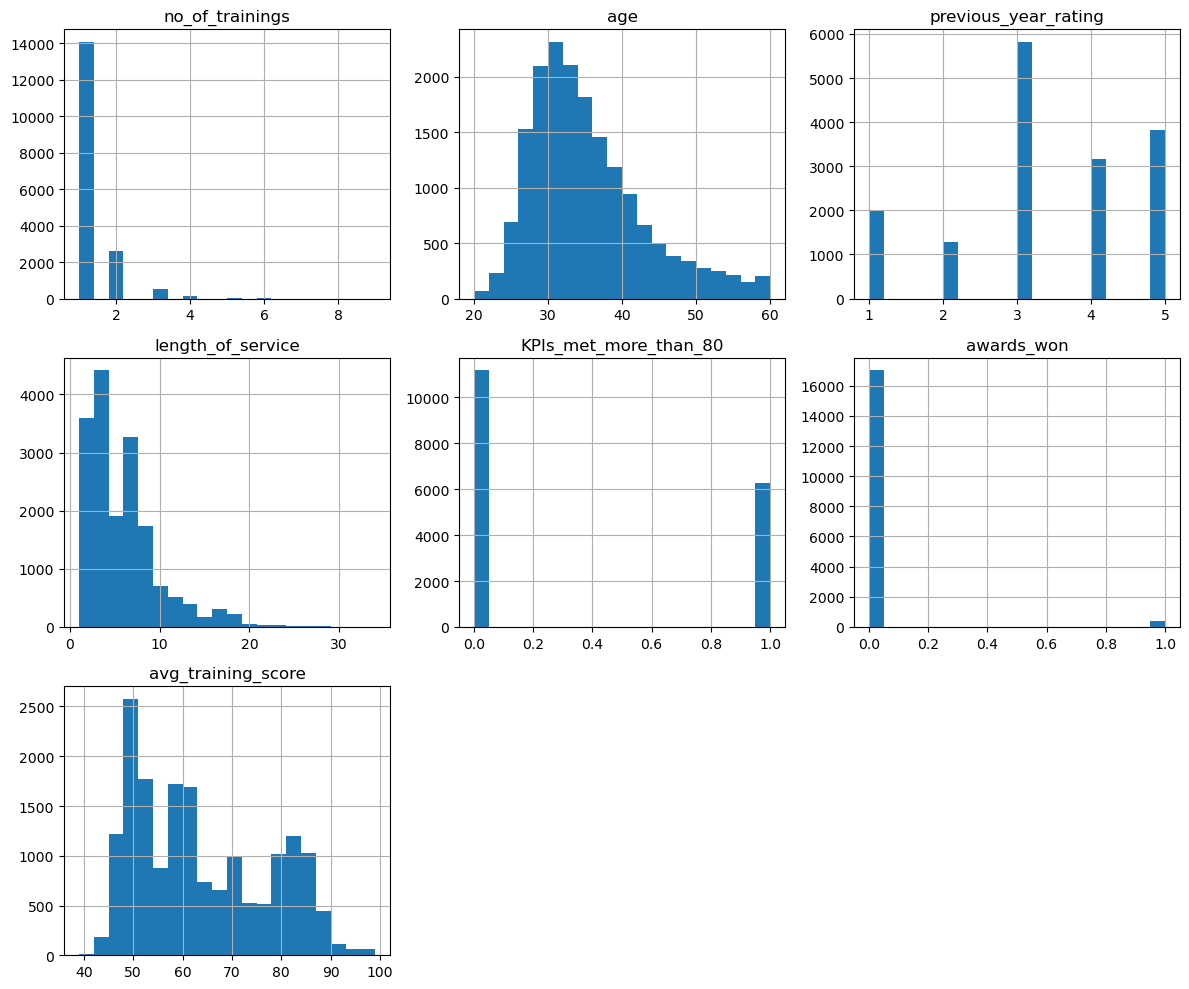

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


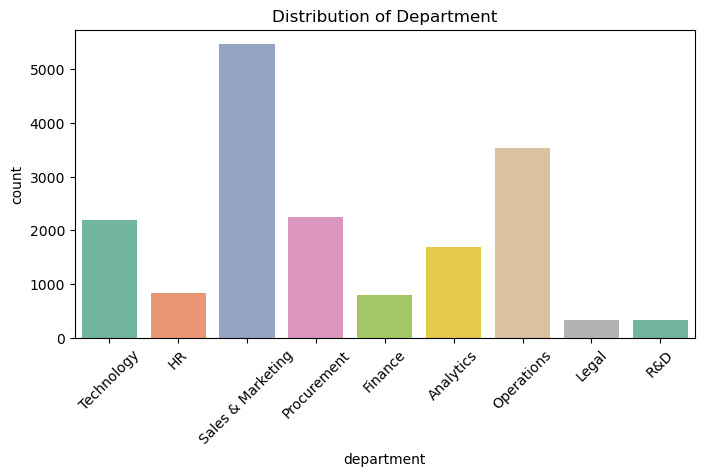

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


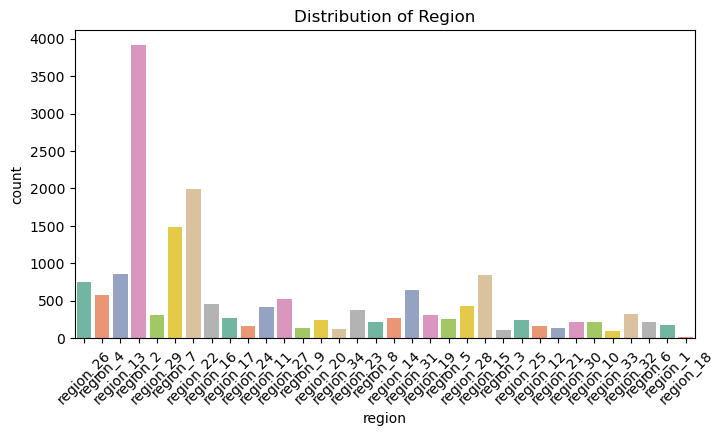

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


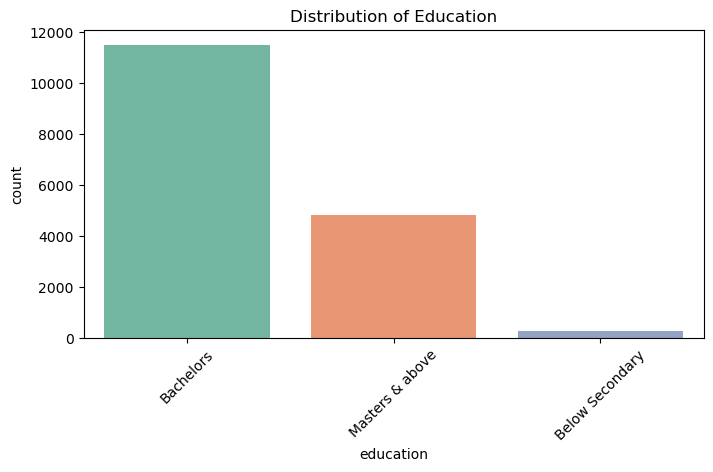

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


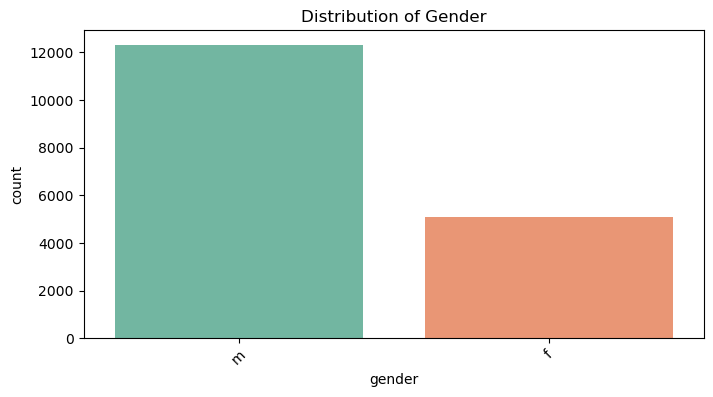

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


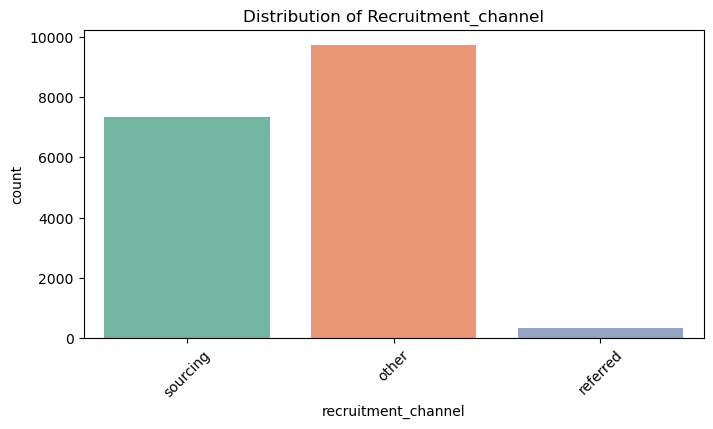

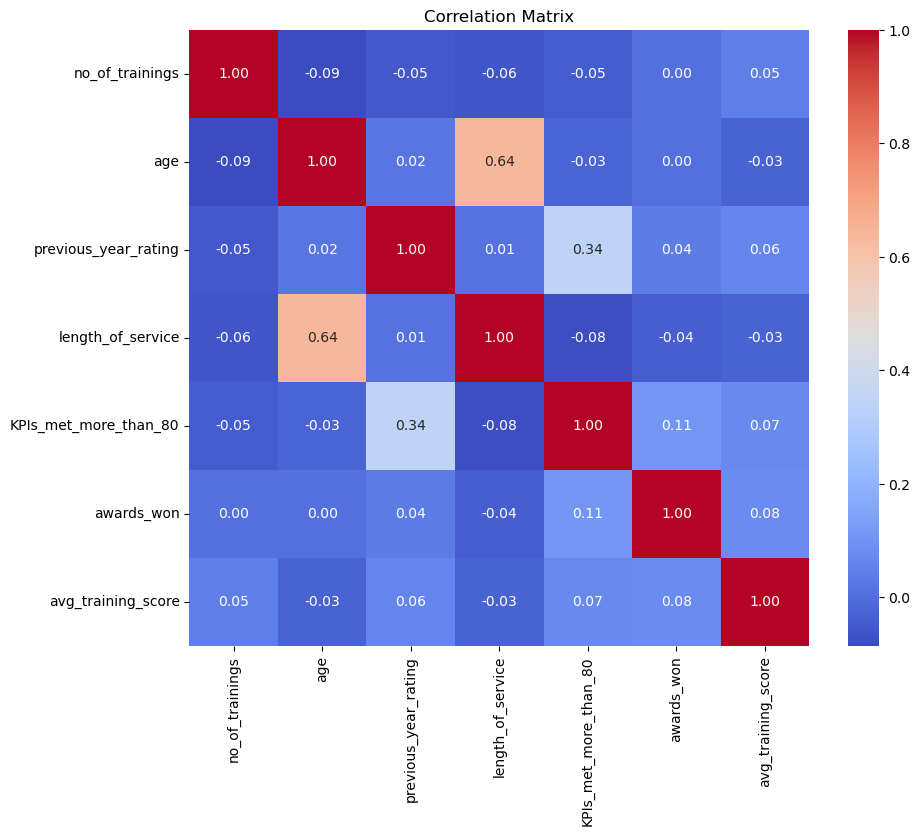

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Accuracy for Bonus Prediction: 1.0
Classification Report for Bonus Prediction:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3400
           1       1.00      1.00      1.00        84

    accuracy                           1.00      3484
   macro avg       1.00      1.00      1.00      3484
weighted avg       1.00      1.00      1.00      3484

Accuracy for Promotion Prediction: 1.0
Classification Report for Promotion Prediction:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2253
           1       1.00      1.00      1.00      1231

    accuracy                           1.00      3484
   macro avg       1.00      1.00      1.00      3484
weighted avg       1.00      1.00      1.00      3484



C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bonus_labels, y=bonus_counts, palette="cool")


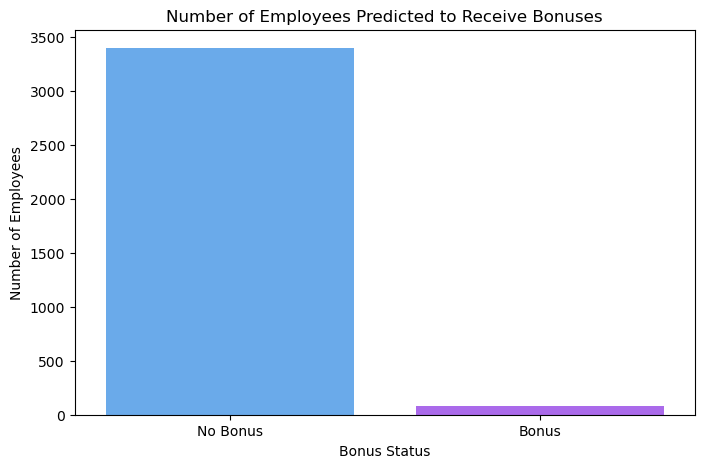

C:\Users\Medhavi\AppData\Local\Temp\ipykernel_15196\1445589188.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_labels, y=promotion_counts, palette="Set2")


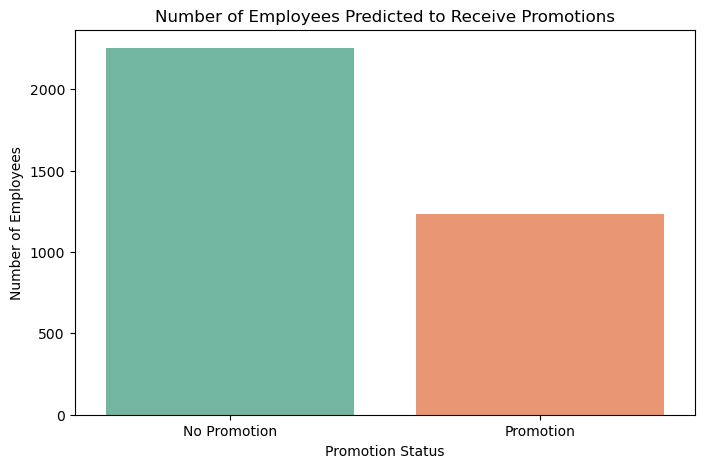

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data_path = "Uncleaned_employees_final_dataset (1).csv"
df = pd.read_csv(data_path)

# Display basic information
def display_info():
    print("Dataset Overview:\n")
    print(df.head())
    print("\nBasic Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nSummary Statistics:\n")
    print(df.describe())

display_info()

# Perform EDA
# Distribution of numerical features
numerical_columns = [
    "no_of_trainings", "age", "previous_year_rating", "length_of_service", 
    "KPIs_met_more_than_80", "awards_won", "avg_training_score"
]
plt.figure(figsize=(12, 10))
df[numerical_columns].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Distribution of categorical features
categorical_columns = ["department", "region", "education", "gender", "recruitment_channel"]
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Handle missing values
# Fill missing values with median for numerical columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Prepare data for bonus prediction
bonus_features = [
    "department", "region", "education", "gender", "recruitment_channel", "no_of_trainings", "age", 
    "previous_year_rating", "length_of_service", "KPIs_met_more_than_80", "awards_won", "avg_training_score"
]
y_bonus = df["awards_won"]  # Assuming awards_won indicates bonus eligibility
X_bonus = df[bonus_features]

# Prepare data for promotion prediction
promotion_features = [
    "department", "region", "education", "gender", "recruitment_channel", "no_of_trainings", "age", 
    "previous_year_rating", "length_of_service", "KPIs_met_more_than_80", "avg_training_score"
]
y_promotion = df["KPIs_met_more_than_80"]  # Assuming KPIs_met_more_than_80 indicates promotion
X_promotion = df[promotion_features]

# Split the data for bonus prediction
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(
    X_bonus, y_bonus, test_size=0.2, random_state=42
)

# Split the data for promotion prediction
X_train_promotion, X_test_promotion, y_train_promotion, y_test_promotion = train_test_split(
    X_promotion, y_promotion, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_bonus = scaler.fit_transform(X_train_bonus)
X_test_bonus = scaler.transform(X_test_bonus)
X_train_promotion = scaler.fit_transform(X_train_promotion)
X_test_promotion = scaler.transform(X_test_promotion)

# Train a Random Forest Classifier for bonus prediction
clf_bonus = RandomForestClassifier(random_state=42, n_estimators=100)
clf_bonus.fit(X_train_bonus, y_train_bonus)

# Train a Random Forest Classifier for promotion prediction
clf_promotion = RandomForestClassifier(random_state=42, n_estimators=100)
clf_promotion.fit(X_train_promotion, y_train_promotion)

# Predictions and evaluation for bonuses
y_pred_bonus = clf_bonus.predict(X_test_bonus)
print("Accuracy for Bonus Prediction:", accuracy_score(y_test_bonus, y_pred_bonus))
print("Classification Report for Bonus Prediction:\n", classification_report(y_test_bonus, y_pred_bonus))

# Predictions and evaluation for promotions
y_pred_promotion = clf_promotion.predict(X_test_promotion)
print("Accuracy for Promotion Prediction:", accuracy_score(y_test_promotion, y_pred_promotion))
print("Classification Report for Promotion Prediction:\n", classification_report(y_test_promotion, y_pred_promotion))

# Bar graph for bonus predictions
bonus_counts = pd.Series(y_pred_bonus).value_counts()
bonus_labels = ["No Bonus", "Bonus"]
plt.figure(figsize=(8, 5))
sns.barplot(x=bonus_labels, y=bonus_counts, palette="cool")
plt.title("Number of Employees Predicted to Receive Bonuses")
plt.ylabel("Number of Employees")
plt.xlabel("Bonus Status")
plt.show()

# Bar graph for promotion predictions
promotion_counts = pd.Series(y_pred_promotion).value_counts()
promotion_labels = ["No Promotion", "Promotion"]
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_labels, y=promotion_counts, palette="Set2")
plt.title("Number of Employees Predicted to Receive Promotions")
plt.ylabel("Number of Employees")
plt.xlabel("Promotion Status")
plt.show()
